In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl



In [19]:
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    


2019-12-17 19:03:49 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [20]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


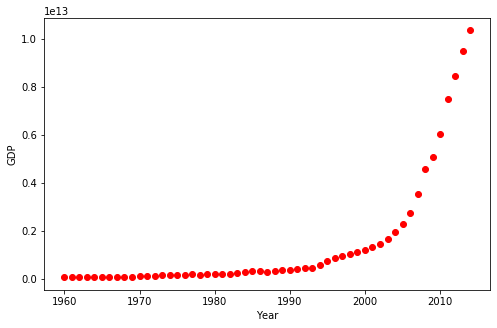

In [21]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

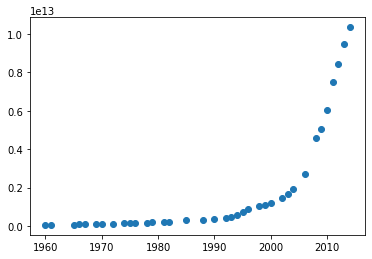

In [26]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
plt.scatter(train.Year,train.Value)

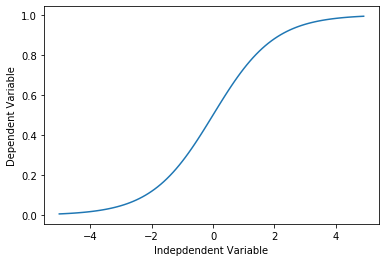

In [10]:
# Example of Sigmoid Function
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [34]:

# Lets normalize our data
train_x_data = train.Year
train_y_data = train.Value
xdata =train_x_data/max(train_x_data)
ydata =train_y_data/max(train_y_data)
test_x_data = test.Year
test_y_data = test.Value
test_xdata =test_x_data/max(test_x_data)
test_ydata =test_y_data/max(test_y_data)

In [40]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 700.692786, beta_2 = 0.997180


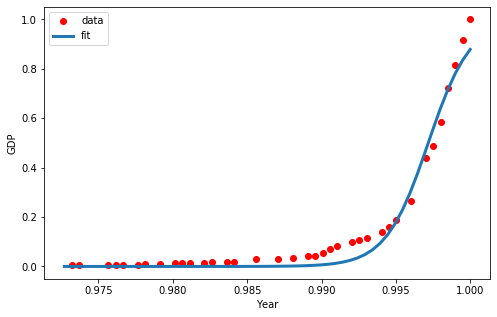

[0.97270471 0.97321018 0.97371565 0.97422112 0.97472659 0.97523206
 0.97573752 0.97624299 0.97674846 0.97725393 0.9777594  0.97826487
 0.97877033 0.9792758  0.97978127 0.98028674 0.98079221 0.98129767
 0.98180314 0.98230861 0.98281408 0.98331955 0.98382502 0.98433048
 0.98483595 0.98534142 0.98584689 0.98635236 0.98685783 0.98736329
 0.98786876 0.98837423 0.9888797  0.98938517 0.98989064 0.9903961
 0.99090157 0.99140704 0.99191251 0.99241798 0.99292344 0.99342891
 0.99393438 0.99443985 0.99494532 0.99545079 0.99595625 0.99646172
 0.99696719 0.99747266 0.99797813 0.9984836  0.99898906 0.99949453
 1.        ]


In [35]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()
print(x)